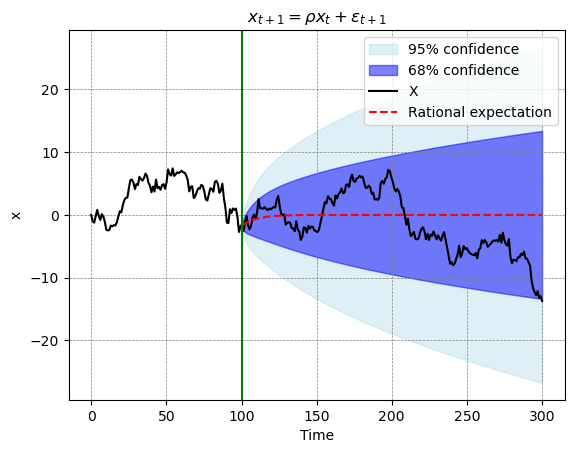

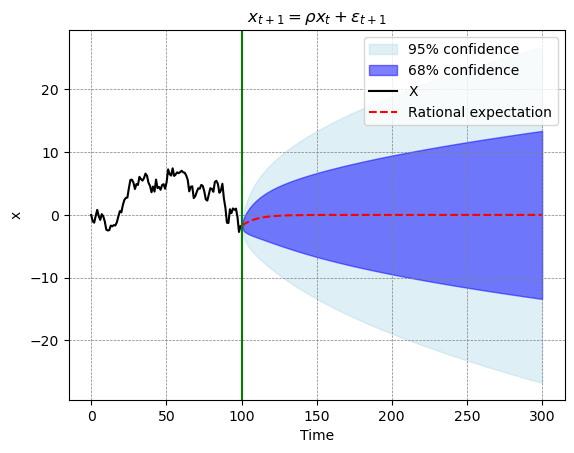

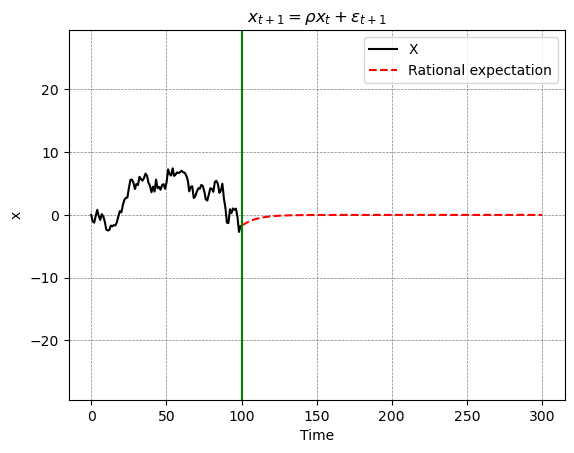

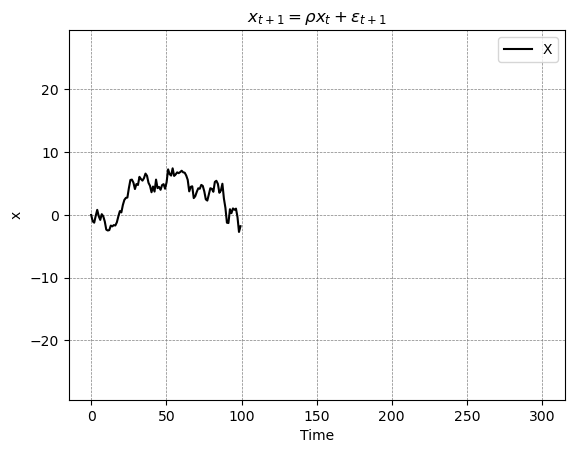

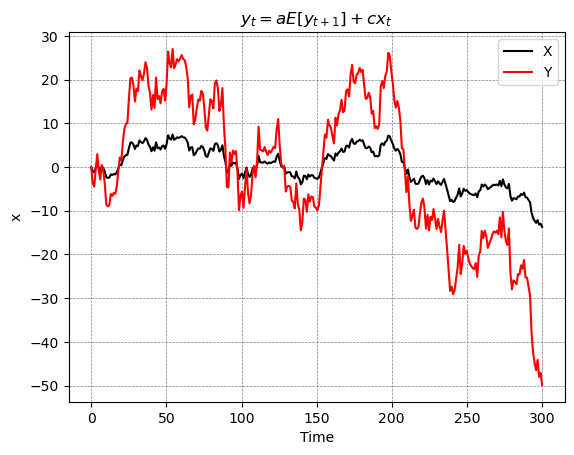

In [40]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits import mplot3d

leng= 300
rho = 0.9
pt = 100

c = 2
a = 0.5

evec = np.random.normal(0,1,leng)
time = np.linspace(0,leng,leng)


#Exogenous variable process
xvec = np.zeros(leng)
for i in range(leng-1):
    xvec[i+1] = xvec[i] + rho*evec[i+1]

#Start forecasting in period pt
expvec = np.empty(leng)
expvec[:] = np.nan
expvar = np.zeros(leng)
expvec[pt] = xvec[pt]
expvar[pt+1] = 1
for i in range(leng-1-pt):
    expvec[pt+i+1] = rho**i*xvec[pt]
    expvar[pt+i+1] = expvar[pt+i] + rho ##variance of oprocess is 1

## Full figure
fig, ax = plt.subplots()
plt.title(r'$x_{t+1} = \rho x_{t}+\varepsilon_{t+1}$')
ax.fill_between(time, expvec+2*np.sqrt(expvar), expvec-2*np.sqrt(expvar),color='lightblue', alpha=0.4, label = '95% confidence')
ax.fill_between(time, expvec+np.sqrt(expvar), expvec-np.sqrt(expvar),color='blue', alpha=0.5, label = '68% confidence')
ax.plot(time,xvec,color='black', label = 'X')
ax.plot(time,expvec,color = 'red', label = 'Rational expectation',linestyle = 'dashed')
plt.xlabel('Time')
plt.ylabel('x')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(pt,color = 'green')
plt.legend()
plt.savefig('RE_ci.pdf')
left,right = plt.xlim()
yleft,yright = plt.ylim()
plt.show()

## Hidden second part
fig, ax = plt.subplots()
plt.title(r'$x_{t+1} = \rho x_{t}+\varepsilon_{t+1}$')
ax.fill_between(time, expvec+2*np.sqrt(expvar), expvec-2*np.sqrt(expvar),color='lightblue', alpha=0.4, label = '95% confidence')
ax.fill_between(time, expvec+np.sqrt(expvar), expvec-np.sqrt(expvar),color='blue', alpha=0.5, label = '68% confidence')
ax.plot(time[0:pt],xvec[0:pt],color='black', label = 'X')
ax.plot(time,expvec,color = 'red', label = 'Rational expectation',linestyle = 'dashed')
plt.xlabel('Time')
plt.ylabel('x')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(pt,color = 'green')
plt.legend()
plt.xlim(left,right)
plt.ylim(yleft,yright)
plt.savefig('RE_hidden.pdf')
plt.show()

## Process + forecast
fig, ax = plt.subplots()
plt.title(r'$x_{t+1} = \rho x_{t}+\varepsilon_{t+1}$')
ax.plot(time[0:100],xvec[0:100],color='black', label = 'X')
ax.plot(time,expvec,color = 'red', label = 'Rational expectation',linestyle = 'dashed')
plt.xlabel('Time')
plt.ylabel('x')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(pt,color = 'green')
plt.legend()
plt.xlim(left,right)
plt.ylim(yleft,yright)
plt.savefig('RE_forecast.pdf')
plt.show()

## Process 
fig, ax = plt.subplots()
plt.title(r'$x_{t+1} = \rho x_{t}+\varepsilon_{t+1}$')
ax.plot(time[0:100],xvec[0:100],color='black', label = 'X')
plt.xlabel('Time')
plt.ylabel('x')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlim(left,right)
plt.ylim(yleft,yright)
plt.savefig('RE_process.pdf')
plt.show()

## Endogenous variable Y
yvec = c/(1-rho*a)*xvec
fig, ax = plt.subplots()
plt.title(r'$y_t = a E[y_{t+1}] + c x_{t}$')
ax.plot(time,xvec,color='black', label = 'X')
ax.plot(time,yvec,color='red', label = 'Y')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('RE_y.pdf')
plt.show()

## The vector of endogenous variables
#plt.plot(time,xvec)
#plt.xlabel('Time')
#plt.ylabel('X')
#plt.title(r'$x_{t+1} = \rho x_{t}+\varepsilon_{t+1}$')
#plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)



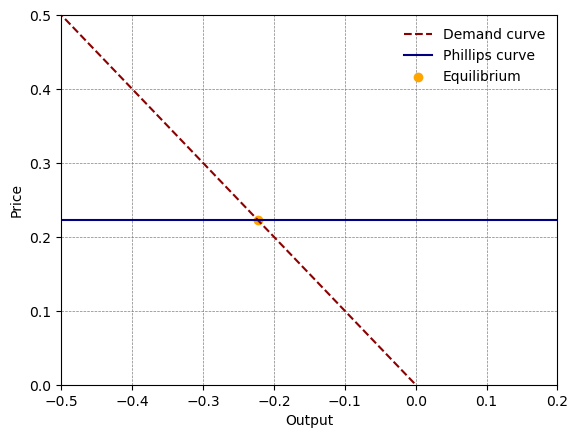

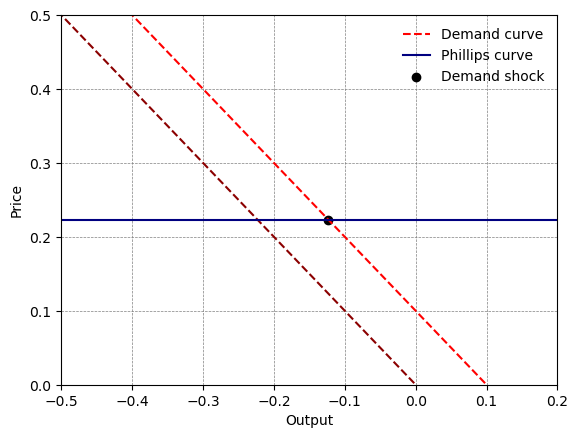

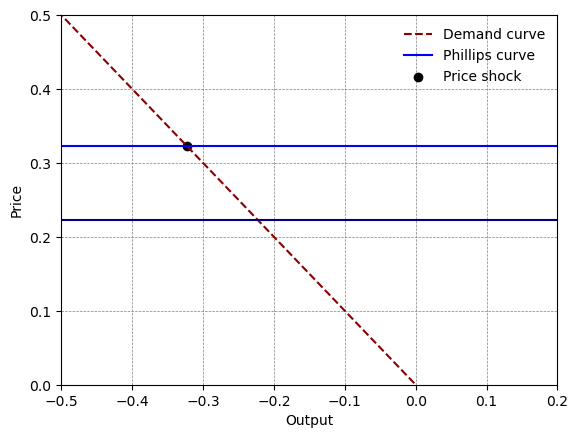

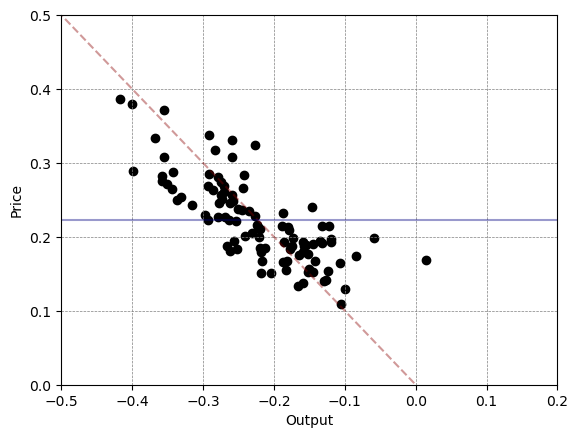

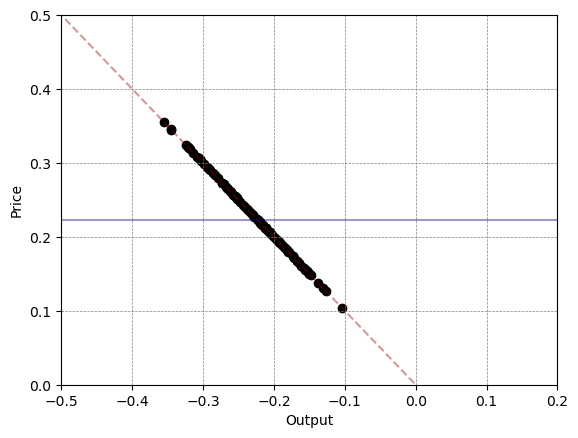

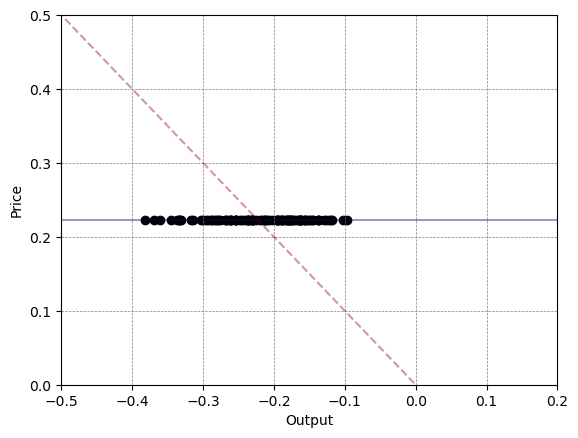

In [57]:
## Simulating the simple Phillips curve model without monetary policy
plt.style.use('tableau-colorblind10')
lines = ["-","--","-.",":","-","--","-.",":"]

leng= 300
pt = 100

theta = 5
phi = 2
M = np.log(theta/(theta-1))
phifrac = 1/(phi-1)

evec = np.random.normal(0,1,leng)
time = np.linspace(0,leng,leng)

## Plot diagram for given value of E[m]=0 and m = 0
p_d = np.linspace(-1,1,10)
y = 0-p_d

p_s = 0+phifrac*M

plt.plot(y,p_d, color = 'darkred', linestyle = 'dashed', label = 'Demand curve')
plt.plot(y,p_s*np.ones(10),color = 'navy', label = 'Phillips curve')
plt.scatter(-phifrac*M,phifrac*M, label = 'Equilibrium', color = 'orange')
plt.ylim(0,0.5)
plt.xlim(-0.5,0.2)
plt.ylabel('Price')
plt.xlabel('Output')
plt.legend(frameon = False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('PC_simple.pdf')
plt.show()

## Demand shock
plt.plot(y,p_d, color = 'darkred', linestyle = 'dashed')
plt.plot(y+0.1,p_d, color = 'red', linestyle = 'dashed', label = 'Demand curve')
plt.plot(y,p_s*np.ones(10),color = 'navy', label = 'Phillips curve')
plt.scatter(-phifrac*M+0.1,phifrac*M, label = 'Demand shock', color = 'black')
plt.ylim(0,0.5)
plt.xlim(-0.5,0.2)
plt.ylabel('Price')
plt.xlabel('Output')
plt.legend(frameon = False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('PC_d.pdf')
plt.show()

## Cost-push shock
plt.plot(y,p_d, color = 'darkred', linestyle = 'dashed', label = 'Demand curve')
plt.plot(y,p_s*np.ones(10),color = 'navy')
plt.plot(y,p_s*np.ones(10)+0.1,color = 'blue', label = 'Phillips curve')
plt.scatter(-phifrac*M-0.1,phifrac*M+0.1, label = 'Price shock', color = 'black')
plt.ylim(0,0.5)
plt.xlim(-0.5,0.2)
plt.ylabel('Price')
plt.xlabel('Output')
plt.legend(frameon = False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('PC_s.pdf')
plt.show()

def simulate_pc(theta,phi,sig_d,sig_s,leng,lab):
    figname = 'PC_'+lab+'.pdf'
    M = np.log(theta/(theta-1))
    phifrac = 1/(phi-1)    
    p_d = np.linspace(-1,1,leng)
    y = 0-p_d
    
    p_s = 0+phifrac*M
    
    dvec = np.random.normal(0,sig_d,leng)
    svec = np.random.normal(0,sig_s,leng)

    pvec = 0 + phifrac*M + svec 
    yvec = dvec - pvec

    plt.scatter(yvec,pvec, color = 'black')
    plt.plot(y,p_d, color = 'darkred', linestyle = 'dashed', alpha=0.4)
    plt.plot(y,p_s*np.ones(leng),color = 'navy', alpha=0.4)
    plt.ylim(0,0.5)
    plt.xlim(-0.5,0.2)
    plt.ylabel('Price')
    plt.xlabel('Output')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.savefig(figname)
    plt.show()


sig_d = 0.06 #Volatility of demand shock
sig_s = 0.06 #Volatility of supply shock
leng = 100 #length of time
simulate_pc(theta,phi,sig_d,sig_s,leng,'all')
simulate_pc(theta,phi,0.000001,sig_s,leng,'sup') ##only supply shocks
simulate_pc(theta,phi,sig_d,0.000001,leng,'dem') ##only demand shocks